In [3]:
%matplotlib inline

import os
from pprint import pprint

# Only needed to embed the images in notebook
from IPython.display import Image

import numpy as np
import matplotlib.pyplot as plt

from srim import TRIM, SR, Ion, Layer, Target
from srim.output import Results

In [6]:
# Directories
# srim_executable_directory = 'C:/Users/Owner/Documents/Repos/SRIM/SRIM-2013' 
# output_directory = 'C:/Users/Owner/Documents/Repos/RadiationDamage/PMI/Simulations/Results/10KeV_data'
# image_directory = r"C:\Users\Owner\Documents\Repos\RadiationDamage\PMI\Simulations\Results\10KeV_data\images"

srim_executable_directory = 'D:/dev/SRIM-2013' 
output_directory = 'D:/dev/simulation_results'
image_directory = 'D:/dev/simulation_results/images'

In [9]:
# Construct a 10KeV He ion
ion = Ion('He', energy=10.0e3)

# Construct a layer of tungsten 20um thick with a displacement energy of 50 eV
layer = Layer({
        'W': {
            'stoich': 1.0, 
            'E_d': 40.0, 
            'lattice': 0.0, 
            'surface': 3.0
        },
}, density=19.3, width=1000.0)

# Construct a target of a single layer of Nickel
target = Target([layer])
trim = TRIM(target, ion, number_ions=5000, calculation=1)
results = trim.run(srim_executable_directory)


In [10]:
# equivalent to results variable gotten from `trim.run`
results = Results(srim_executable_directory)

The results variable contains dictionary of automatically parsed TRIM output files.

If you needed to get the results later. Suppose you no longer had the results variable.
The results from the calculation were written to the `srim_executable_directory`

In [13]:
print('Number of Ions: {}'.format(results.ioniz.num_ions))
results.__dict__

Number of Ions: 5000


{'ioniz': <srim.output.Ioniz at 0x170071e7800>,
 'vacancy': <srim.output.Vacancy at 0x170071d8230>,
 'novac': None,
 'etorecoils': <srim.output.EnergyToRecoils at 0x170071e7890>,
 'phonons': <srim.output.Phonons at 0x170071fe720>,
 'range': <srim.output.Range at 0x170071fd9a0>}

# Copy SRIM files
Helper function to copy SRIM files from one directory to another. Covers all of the output files.

In [14]:

os.makedirs(output_directory, exist_ok=True)
print('Before:', os.listdir(output_directory))
TRIM.copy_output_files(srim_executable_directory, output_directory)
print('After:', os.listdir(output_directory))

Before: ['images']
After: ['E2RECOIL.txt', 'images', 'IONIZ.txt', 'LATERAL.txt', 'NOVAC.txt', 'PHONON.txt', 'RANGE.txt', 'TDATA.txt', 'TRIM.IN', 'VACANCY.txt']


# Damage energy

In [11]:
def plot_damage_energy(results, ax):
    phon = results.phonons
    dx = max(phon.depth) / 100.0 # to units of Angstroms
    energy_damage = (phon.ions + phon.recoils) * dx
    ax.plot(phon.depth, energy_damage / phon.num_ions, label="damage")
    return sum(energy_damage)

def plot_ionization(results, ax):
    ioniz = results.ioniz
    dx = max(ioniz.depth) / 100.0 # to units of Angstroms
    ax.plot(ioniz.depth, ioniz.ions, label='Ionization from Ions')
    ax.plot(ioniz.depth, ioniz.recoils, label='Ionization from Recoils')
    
def plot_vacancies(results, ax):
    vac = results.vacancy
    vacancy_depth = vac.knock_ons + np.sum(vac.vacancies, axis=1)
    ax.plot(vac.depth, vacancy_depth, label="Total vacancies at depth")
    return sum(vacancy_depth)


Damage energy: 1819.7740519885444 eV


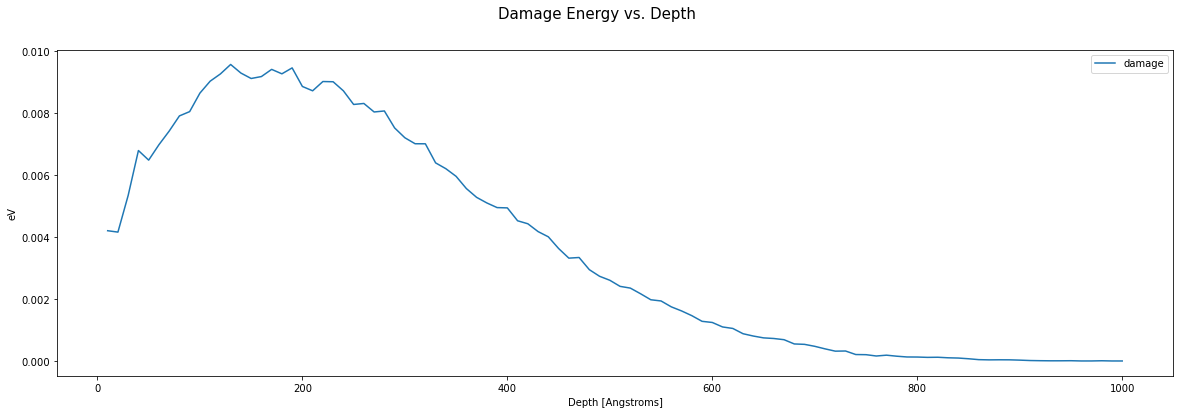

In [12]:
fig, ax = plt.subplots()
energy_damage = plot_damage_energy(results, ax)
print("Damage energy: {} eV".format(energy_damage))
ax.set_xlabel('Depth [Angstroms]')
ax.set_ylabel('eV')
ax.legend()

fig.suptitle('Damage Energy vs. Depth', fontsize=15)
fig.set_size_inches((20, 6))
fig.savefig(os.path.join(image_directory, 'damagevsdepth.png'), transparent=True)

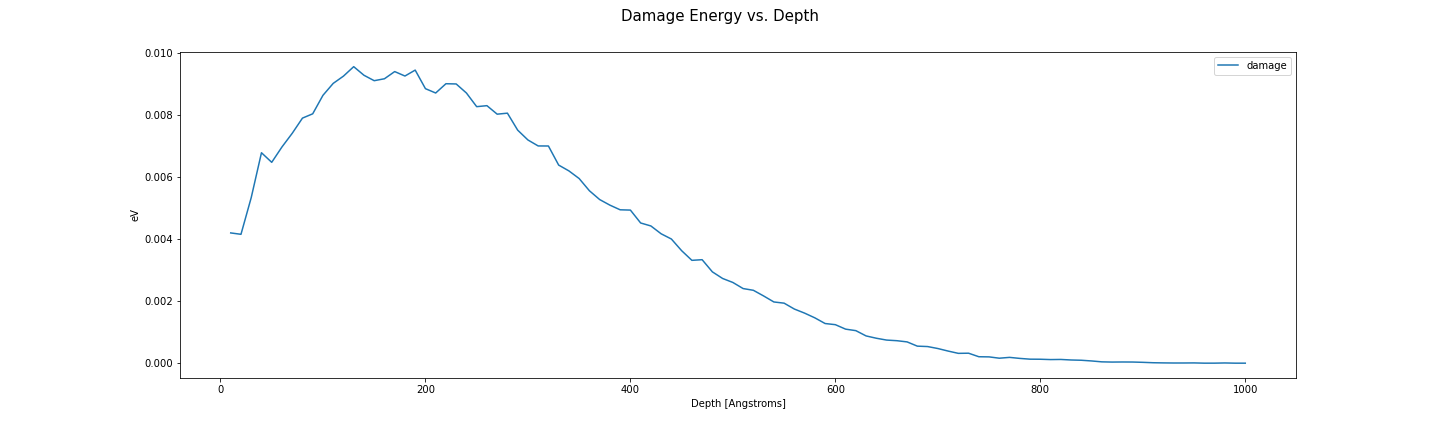

In [13]:
Image(filename=os.path.join(image_directory, 'damagevsdepth.png'))

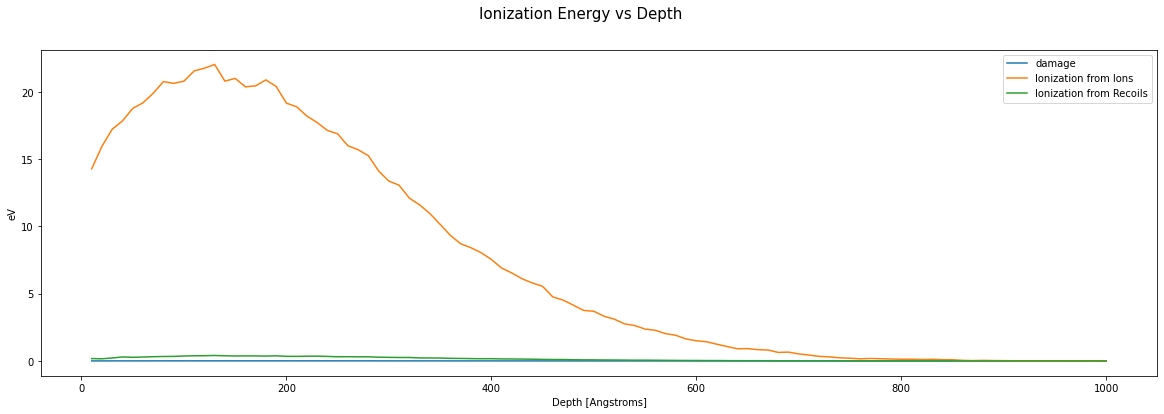

In [14]:
fig, ax = plt.subplots()

plot_damage_energy(results, ax)
plot_ionization(results, ax)
ax.legend()
ax.set_ylabel('eV')
ax.set_xlabel('Depth [Angstroms]')
fig.suptitle('Ionization Energy vs Depth', fontsize=15)
fig.set_size_inches((20, 6))
fig.savefig(os.path.join(image_directory, 'ionizationvsdepth.png'), transparent=True)

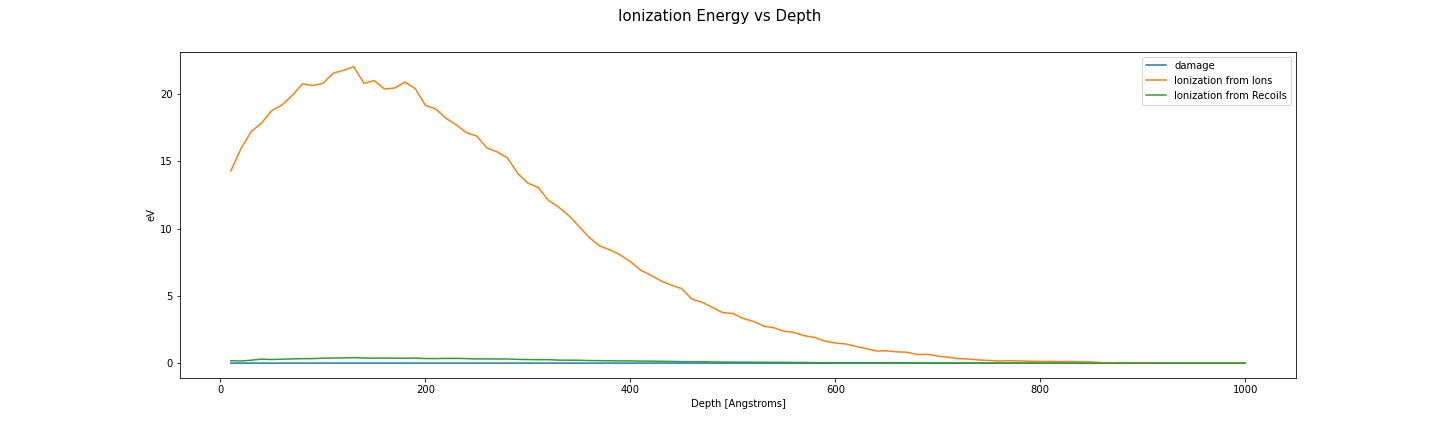

In [15]:
Image(filename=os.path.join(image_directory, 'ionizationvsdepth.png'))

Total number of vacancies: 1.0192923755560002


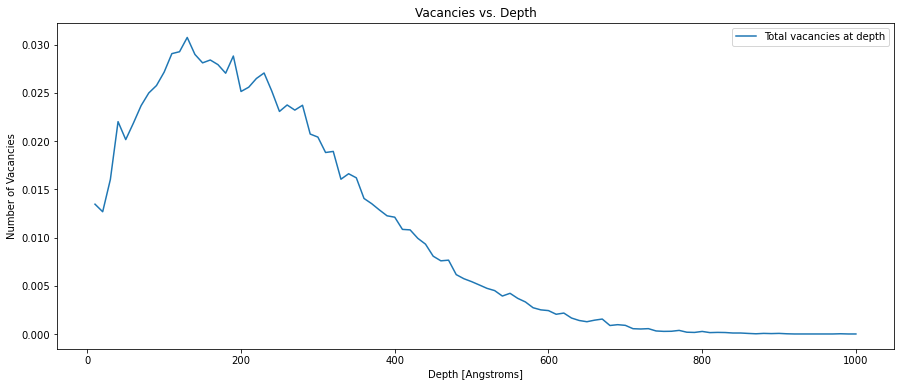

In [16]:
fig, ax = plt.subplots()

total_vacancies = plot_vacancies(results, ax)
print("Total number of vacancies: {}".format(total_vacancies))

ax.set_xlabel('Depth [Angstroms]')
ax.set_ylabel('Number of Vacancies')
ax.set_title('Vacancies vs. Depth')
ax.legend()
fig.set_size_inches((15, 6))
fig.savefig(os.path.join(image_directory, 'vacanciesvsdepth.png'), transparent=True)

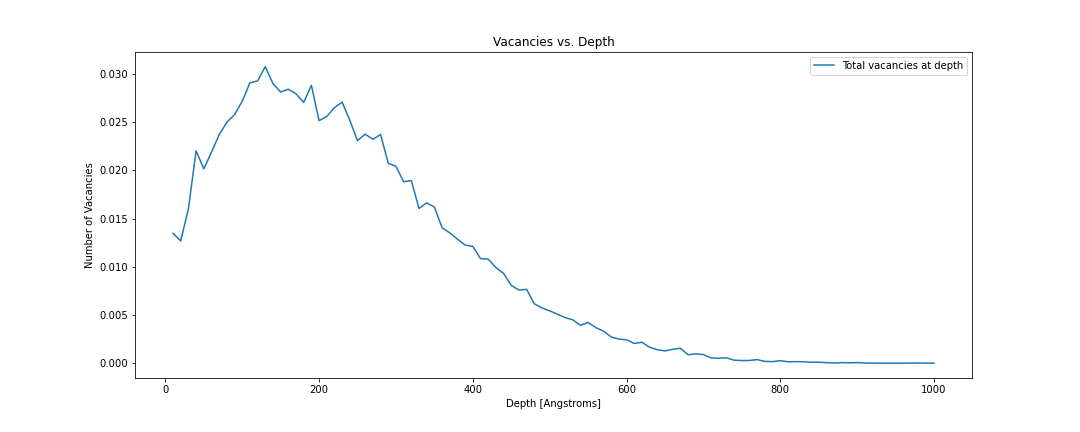

In [17]:
Image(filename=os.path.join(image_directory, 'vacanciesvsdepth.png'))